In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Input,Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, precision_score, recall_score, f1_score)

In [79]:
path = "sample_data/ionosphere.data"
df = pd.read_csv(path, header = None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


¿Qué representan las features medidas por el radar? ¿Son todas numéricas?

Las features del radar represetan la medicion de una onda en un instante de tiempo por 17 radares, la cual incluye: 
* la parte real 
* la parte imaginaria.
Estas features son todas numericas.

El dataframe ademas contiene el target que indica si la señal es buena o mala y es un campo del tipo caracter.

In [80]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


¿Es necesario algún tipo de normalización o escalado previo al entrenamiento
de la red?

En este caso, todas las features corresponden a las compotentes R e Img de una misma señal de radas, las cuales se encuentran dentro del rango [-1,1].

Dado que las 34 variables representan valores numericos acotados y desvio estandar similares, no existe una diferencia significativa entre ellas.

Por lo tanto, no seria necesario aplicar un paso adicional de normalizacion o escalado previo al entrenamiento, ya que las magnitudes de las features son comparables.

Renombrar columnas del dataframe de la siguiente forma:
f1_real, f1_img ; f2_real, f2_img...

In [81]:
colums = list()

for i in range(1,18):
    col1 = "f" + str(i) + "_r"
    col2 = "f" + str(i) + "_i"
    colums.append(col1)
    colums.append(col2)

colums.append("target")

df.columns = colums

print(df)

df.describe()


     f1_r  f1_i     f2_r     f2_i     f3_r     f3_i     f4_r     f4_i  \
0       1     0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708   
1       1     0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597   
2       1     0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062   
3       1     0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000   
4       1     0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255   
..    ...   ...      ...      ...      ...      ...      ...      ...   
346     1     0  0.83508  0.08298  0.73739 -0.14706  0.84349 -0.05567   
347     1     0  0.95113  0.00419  0.95183 -0.02723  0.93438 -0.01920   
348     1     0  0.94701 -0.00034  0.93207 -0.03227  0.95177 -0.03431   
349     1     0  0.90608 -0.01657  0.98122 -0.01989  0.95691 -0.03646   
350     1     0  0.84710  0.13533  0.73638 -0.06151  0.87873  0.08260   

        f5_r     f5_i  ...    f13_i    f14_r    f14_i    f15_r    f15_i  \
0    1.00000  0.03760  ... -0.51171  0.41078 -0.

,f1_r,f1_i,f2_r,f2_i,f3_r,f3_i,f4_r,f4_i,f5_r,f5_i,...,f13_r,f13_i,f14_r,f14_i,f15_r,f15_i,f16_r,f16_i,f17_r,f17_i
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Convertir target
Convertimos los target g (good) y b (bad) a valores numericos 1 y 0 respectivamente.

In [82]:
_class = {'g' : 1, 'b' : 0}
df["target"] = df["target"].map(_class)

In [83]:
print(df)

     f1_r  f1_i     f2_r     f2_i     f3_r     f3_i     f4_r     f4_i  \
0       1     0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708   
1       1     0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597   
2       1     0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062   
3       1     0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000   
4       1     0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255   
..    ...   ...      ...      ...      ...      ...      ...      ...   
346     1     0  0.83508  0.08298  0.73739 -0.14706  0.84349 -0.05567   
347     1     0  0.95113  0.00419  0.95183 -0.02723  0.93438 -0.01920   
348     1     0  0.94701 -0.00034  0.93207 -0.03227  0.95177 -0.03431   
349     1     0  0.90608 -0.01657  0.98122 -0.01989  0.95691 -0.03646   
350     1     0  0.84710  0.13533  0.73638 -0.06151  0.87873  0.08260   

        f5_r     f5_i  ...    f13_i    f14_r    f14_i    f15_r    f15_i  \
0    1.00000  0.03760  ... -0.51171  0.41078 -0.

# Ingenieria de datos
Ahora que los target son numericos podemos hacer un analisis de balance de datos


In [84]:
print(df["target"].value_counts())

target
1    225
0    126
Name: count, dtype: int64


* Como hay mas mediciones buenas que malas, debemos equilibrar el set de datos.
* Es decir, debemos tener la misma cantidad de datos buenos que malos.
* Esto se hace para evitar un sesgo en el modelo, ya que al tener mayor cantidad de datos buenos, el modelo aprende principalmente los patrones de esa clase y tiende a clasificar los nuevos datos como "buenos", incluso cuando no lo son.
* Esto no implica que haya memorizado los datos (overfitting), si no que la representacion de la clase "bad" es insuficiente para aprender correctamente su frontera de desicion.

### Tecnicas para corregir el desbalance

| Técnica        | Qué hace                                   | Ventajas                          | Desventajas                       |
|----------------|---------------------------------------------|------------------------------------|------------------------------------|
| Undersampling  | Reduce el numero de ejemplos de la  clase mayoritaria, eliminando de forma aleatoria los registros hasta igualar la cantidad minoritaria   | Rapido y facil de aplicar.<br>Reduce el tamaño del dataset, por lo tanto menos tiempo de entrenamiento             | Se pierde informacion valiosa de la clase mayoritaria. Para dataset pequeños puede empeorar la generalizacion. Corremos el riesgo de eliminar ejemplos representativos.                |
| Oversampling   | Duplica de forma aleatoria ejemplos de la clase minoritaria hasta equilibrar las clases    | Se mantiene los datos originales.<br> Facil de implementar                | Duplica datos, lo que puede causar overfitting (La red memoriza los ejemplos repetidos).<br>No aporta nueva informacion, solo repite los mismos casos.             |
| SMOTE          | Crea ejemplos sintéticos de la minoritaria interpolando entre ejemplos reales cercanos. Por ejemplo si tenemos dos datos minoritarios A y B, Smote crea uno nuevo entre ambos, con valores intermedios.  | Aumenta la clase minoritaria sin duplicar ejemplos. Introduce variabilidad, lo que reduce el overfitting respecto al oversampling.<br>Mejora el aprendizaje de fronteras de decision.   | Puede generar ejemplos irreales si la frontera entre clases esta mal definida.<br>No funciona bien si la clase minoritaria esta muy dispersa o tiene outliers   |
| Data Augmentation        | Crea datos artificiales de la clase minoritaria aplicando transformaciones controladas. Es comun utilizarlo en imagenes o audio.| Genera datos diversos y realistas. Mejora la capacidad de la generalizacion. | Require definir que transformaciones tienen sentido fisicamente, ya que no todo cambio conserva la etiqueta. En datos tabulares es dificil definir transformaciones validas sin distorcionar la estructura del dato.|


| Técnica        | Utilizarlo :                               |
|---------------------------|------------------------------------|
| Undersampling  |Cuando el dataset es muy grande y se puede "sacrificar" informacion de la clase mayoritaria sin afectar el aprendizaje.            |
| Oversampling   | Cuando tenemos pocos datos y queremos aumentar la proporcion de la clase minoritaria sin perfer informacion.                     |
| SMOTE          | Cuando el dataset es de tamaño moderado y queremos balancear datos sin perder informacion ni repetir ejemplos identicos. |
| Data Augmentation          | Es ideal para imagenes, sonito o texto. En el caso de datos tabulares no es recomdable, excepto que se implementen transofrmaciones especificas. |


### Nuevo dataframe con datos equilibrados

In [85]:

#counter = 99
#df_new = pd.DataFrame() 
#for index, row in df.iterrows():
#    if counter > 0:
#        if row['target'] == 1 :
#            counter -= 1
#        else:
#            df_new = pd.concat([df_new, pd.DataFrame([row])])
#    else:
#        df_new = pd.concat([df_new, pd.DataFrame([row])])        

In [86]:
#Divido el df por clase
df_good = df[df['target'] == 1]
df_bad = df[df['target'] == 0]

#Hago un undersampling de los datos "good" para igualar con la cantidad de "bad"
df_good_downsampled = resample(df_good, replace = False, n_samples=len(df_bad), random_state=42)

#Combino ambos df
df_balanced = pd.concat([df_good_downsampled, df_bad])

# sample , frac = 1 , toma el 100 de los datos, es decir todas las filas, pero en orden aleatorio
# Es como barajar el data set.
# ramdon_state = 42, semilla, para obtener siempre el mismo orden cada vez que ejecute la notebook
# reset_index(drop = True) : restaura los indices y elimina los anteriores.
# finalmente df_balanced contiene todas las filas, en orden aleatorio, con indices limpios.
df_balanced = df_balanced.sample(frac = 1, random_state = 42).reset_index(drop = True)



In [87]:
print(df_balanced['target'].value_counts())

target
0    126
1    126
Name: count, dtype: int64


Para corregir el desbalance, se aplico un undersampling de la clase mayoritaria, en este caso "good", eliminando ejemplos de forma aleatoria hasta igualar la cantidad de datos de ambas clases.

Asi el dataset final presenta datos balanceados, reduciendo el sesgo del modelo hacia la clase mayoritaria.

### Dividir los datos en features y target

In [88]:
features = df_balanced.loc[:, df_balanced.columns != 'target']
target = df_balanced.loc[:, df_balanced.columns == 'target']

### Dividir los datos en train y test

In [89]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [90]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(201, 34)
(51, 34)
(201, 1)
(51, 1)


# Creacion y entrenamiento del modelo

### Condifuracion del modelo

### Definicion de la arquitectura del modelo MPL

¿Cuántas capas ocultas y cuántas neuronas por capa se pueden considerar adecuadas para este dataset? ¿Por qué?

No hay un numero magico y unico que sea correcto.

El numero de capas y neuronas son hiperparametros que se deben elegir antes de entrenar el modelo.

El objetivo es encontrar una arquitectura que sea lo suficientemente compleja para entender los patrones de los datos, pero no tan compleja para que se los memorice (overfiting)

### Cantidad de capas - Profundidad

Teorema de aproximacion universal: una red neuronal con una sola capa oculta, dada suficientes neuronas, puede, en teoria, aproximar cualquier funcion continua.

Dado que tenemos datos tabulares y no una jerarquia de caracteristicas complejas (como una imagen), **una capa es el punto de partida mas logico y eficiente.**

Se puede usar mas capas cuando el problema tiene una estructura jerarquica. 

Empezar con 2 o 3 capas en un dataset pequeño aumenta el numero de parametros (pesos) y hace que el modelo sea muy propenso a sobreajustar (overfitting).



### Cantidad de neuronas por capa - Ancho

Un buen punto de partida es usar **un numero de neuronas entre el tamaño de la capa de entrada y el tamaño de la capa de salida**

- Datos de entrada : 34 features

- Salida : una neurona (clasificacion binaria)

- Por lo tanto un numero entre 1 y 34 es una opcion conversadora.

Sin embargo en la practica se usa heuristicas:
- Potencias de 2: es comun usar 16, 32, 64...es una convencion por eficiencia computacional. 

- Fraccion de las entradas: 2/3 del tamaño de la entrada. En este caso 34 * (2/3) = 22 neuronas

Se debe tener cuidado con el **overfiting**, ya que al usar un numero elevado de nueronas (# neuronas >>> # train_set), el modelo podria memoriar las muestras facilmente.


### Funcion de activacion

| Funcion de activacion       | Qué hace                                   | Donde usarla                          | Imparcto en el gradiente                       |
|----------------|---------------------------------------------|------------------------------------|------------------------------------|
| Sigmoide:<br> g(z) = 1 / 1 + e^-z  | Transforma cualquier numero a un rango entre 0 y 1   | Capa de salida en el caso de clasificacion binaria | La grafica de su derivada tiene la forma de una pequeña colina con una valor max de 0.25 cuando z = 0.<br>Si la entrada z es un numero grande, la curva sigmoide es casi plana. Su derivada es casi 0.<br> Esto se llama saturacion. En el backpropagation, se multiplica repetidamente por numeros muy pequeños, lo cual tiende a 0.<br> Esto se conoce como **problema del desvanecimiento del gradiente** (vanishing gradient). El mensaje de correcion se "desvanece" y las primeras capas de la red dejan de aprender.              |
| Tangente hiperbolica tanh(z)  | Transforma cualquier numero a un rango entre -1 y 1| Se la utiliza en capas ocultas.            | Su derivada es mas fuerte que sigmoide, con un maximo de 1.<br> Como su salida esta centrada en 0 (de -1 a 1), ayuda a que el aprendizaje sea un poco mas eficiente que con sigmoide.<br>Es mejor, pero todavia se satura. En los extremos (valores de entrada grandes), su derivada tambien es casi 0. El problema del vanishing gradient es mejor, pero aun existe en redes profundas. |
| **Unidad de linea rectificada : ReLu**          | Es simple:<br> g(z) = max(0,z).<br> Si entrada z < 0 -> 0<br>Si entrada z > 0 -> z  | En la actualidad es la eleccion predeterminada y recomendada para las capas ocultas.   | La derivada es 0 para entradas negativas y 1 para entradas positivas.<br>Mientras la neurona este activa (con entrada positiva), el gradiente se multiplica por 1. El mensaje de correcion pasa hacia atras sin perder fuerza.<br> Esto soluciona el problema del desvanecimiento del gradiente y permite que redes mucho mas profundas puedan aprender eficazmente.<br>**Posible problema:** Si una neurona se "atasca" recibiendo siempre entradas negativas, su gradiente siempre sera 0 y deja de aprender ("muere"). Esto se llama el "problema de la ReLU muerta", pero en la practica no suele ser un gran impedimento|



* Para las capas ocultas se eligio la funcion de activacion **ReLu**, ya que no presenta el problema del vanishing gradient, frente sigmoide y tanh que si lo presentan.

* Para la capa de salida se eligio la funcion **sigmoid**, que transforma a cualquier numero a un valor entre 0 y 1, lo cual en problemas de clasificacion se lo interpreta como la probabilidad que el modelo le asigna a la muestra de pertenecer a la clase "buena" (Clase 1)

Como se toma la desicion final?

La probabilidad cruda, no es el resultado final, ya que para obtener un 0 o 1, se aplica un umbral (threshold).

Umbral estandas: es por defecto 0.5.
- si la salida es >= 0.5, prediccion 1 ("bueno")
- si la salida es < 0.5, prediccion 0 ("malo")




### Dimension de los datos de entrada

In [91]:
input_dim = x_train.shape[1]

### Modelos de una capa oculta

In [92]:
model1_16 = Sequential([
    Input(shape=(input_dim,)),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model1_32 = Sequential([
    Input(shape=(input_dim,)),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model1_64 = Sequential([
    Input(shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

### Modelo de 2 capas ocultas

In [93]:
model2_64_32 = Sequential([
    Input(shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model2_32_16 = Sequential([
    Input(shape=(input_dim,)),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model2_16_8 = Sequential([
    Input(shape=(input_dim,)),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

### Modelos de 3 capas ocultas

In [94]:
model3_64_32_16 = Sequential([
    Input(shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model3_32_16_8 = Sequential([
    Input(shape=(input_dim,)),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

### Molode de 4 capas ocultas


In [95]:
model4_64_32_16_8 = Sequential([
    Input(shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

### Compilacion de modelo

### Eleccion de la funcion de perdida



La funcion de perdida o (Loss Function) es el "evaluador" del modelo. Es la metrica que le dice a la red que **tan mal** estuvo su prediccion en cada iteracion.
* Si la prediccion es muy buena, la perdida es **baja** (castigo pequeño)
* Si la prediccion es muy mala, la perdida es alta (castigo grande)

La funcion de perdida depende del problema a resolver y de la funcion de activacion de la ultima capa.

| Loss Function       | Qué es?                                  | Cuando usarla?                          
|----------------|---------------------------------------------|------------------------------------
| Mean Squeared Error (MSE) - Error cuadratico medio | Se la utiliza en problemas de regresion. | Cuando se quiere predecir un numero continuo.
| Categorical Cross-Entropy (Entropia Cruzada Categorica) | Es la funcion de perdida para problemas de **Clasificacion multiclase**.Es una funcion diseñada para problemas donde un ejemplo solo puede pertenecer a una de muchas clases| Cuando tenemos 3 o mas clases. Funciona en conjunto con una capa de salida **Dense(N_Clases, activation = softmax**)         
| **Binary Cross-Entropy (Entropia cruzada binaria)** |Es la funcion de perdida para problemas de clasificacion binaria |Cuando tenemos dos clases mutuamente excluyentes. Esta diseñada para funcionar en conjunto con una capada de salida **Dense(1, activation='sigmoid')**



### Algoritmo de optimizacion
Todos tiene el mismo objetivo, minimizar la funcion de perdida ajustando los pesos W del modelo.<br>Lo hacen usando el gradiente descendiente, que es el proceso de calcular el error y "propagarlo" <br>hacia atras para actualizar los pesos en la direccion opuesta al gradiente (el error).



| Optimizador       | Como funciona                                   | Ventajas                          | Desventajas                       |
|----------------|---------------------------------------------|------------------------------------|------------------------------------|
| SGD (Stochastic Gradient Descent)  | Es el metodo base. Calcula el gradiente (diraccion de maximo ascendo del error) usando un pequeño batch de datos y actualiza los pesos dando un paso en la direccion opuesta al gradiente.<br> Ese paso esta controlador por una tasa de aprendizaje fija $\eta$ que se define. Esta estrategia asegura que, en cada paso, el modelo se mueva cuesta abajo, para minimizar la loss function. <br> $$w_{\text{nuevo}} = w_{\text{viejo}} - \eta \times \text{gradiente}$$ | **Ligero**: requiere menos computo y memoria.<br>**Generalizacion**:El "ruido" de las actualizaciones por batch puede ayudar al modelo a evitar minimos locales malos.| **Sensible:** se debe elegir  $\eta$ de forma manual. Si es muy alto, nunca converge. Si es muy bajo es lento.<br>**Ineficiente**: Oscila mucho en direcciones de alta curvatura.            |
| RMSprop (Root mean Squeare Propagation)   | Es un optimizador adaptativo, su objetivo es solucionar uno de los mayores problemas de SGD: usa el mismo ($\eta$) para todos los pesos.<br>La estrategia que usa es "tasa de aprendizaje adaptativa": a cada W le da su propio ($\eta$) individual. Lo logra "amortiguando" la actualizacion del gradiente basandose en un historial de los gradientes pasados.<br> 1. Mantiene una memoria (promedio S) de los gradientes al cuadrado (g^2) para cada paso. Esta memoria se actualiza en cada paso.<br>  2.Actualiza los pesos.<br> $$w = w - \frac{\eta}{\sqrt{S + \epsilon}} \times g$$<br>epsilon : valor muy pequeño para evitar div 0 si S = 0 | **Adaptativo:** Si el gradiente es grande y oscila, $v$ crece y el paso se reduce. Si el gradiente es pequeño, $v$ decrece y el paso aumenta.<br><br> $v$ es el nombre de una variable, una memoria, que almacena un promedio móvil de los gradientes al cuadrado ($g^2$) de los pasos anteriores.<br><br> **Rapido:** Converge mucho mas rapido que SGD en problemas complejos.                 |**Incompleto:** Solo se adapta a la magnitud del gradiente, pero no ala direccion consistente.           |
| Adam (Adaptive Moment Estimation)          | Combina los dos optimizadores anteriores: Momentum y RMSProp.<br> Adam no solo adapta ($\eta$) para cada W basandose en la volatilidad (como RMSprop), sino que tambien acelera el aprendizaje basandose en la direccion consistente (Momentun).<br><br>Adam mantiene dos memorias separadas (promedios exponenciales para cada W de la red):<br><br>1. m (el primer momento): almacena un promedio de los gradientes (g). Si el gradiente apunta consistentemente en la misma direccion, m ganara velocidad en esa direc.<br>2. $v$ (El segundo Momento): Almacena un promedio de g^2. Esta es la parte de RMSprop. Si el gradiente oscila mucho, $v$ se volvera grande.<br><br>$$w = w - \frac{\eta}{\sqrt{v + \epsilon}} \times m$$|**Robusto:**: Es el optimizador "todo terreno". Funciona excelentemente en la mayoria de problemas (img, texto, datos tabulados), sin necesidad de ajustar $\eta$ manualmente |**Mas complejo:** Requiere un poco mas de memoria para almacenar $m$ y $v$ por cada peso, pero es un costo insignificante en la practica.   |



### Por que funciona Adam: 
Al usar ambas memorias en la actualizacion, obtenemos un doble beneficio:<br>El termino **m** asegura que la actualizacion no sea ruidosa. En lugar de usar el gradiente crudo (g) del batch actual, usa el promedio suavizado (m). Esto permite que el modelo atraviese minimos locales y acelere en las direcciones correctas y estables.<br>El termino $\frac{1}{\sqrt{v}}$ (RMSprop) Es la taza de aprendizaje adaptativa. Frena la actualizacion (el paso) en las direcciones donde el gradiente es muy volatil. (donde $v$ es grande) y la acelera en direcciones donde el gradiente es pequeño y estable. (donde $v$ es pequeño)

In [96]:
model1_16.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate=0.001),
    metrics = ['accuracy', Precision(name = 'precision'), Recall(name = 'recall')]
)

model1_32.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate=0.001),
    metrics = ['accuracy', Precision(name = 'precision'), Recall(name = 'recall')]
)

model1_64.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate=0.001),
    metrics = ['accuracy', Precision(name = 'precision'), Recall(name = 'recall')]
)

In [97]:
model2_64_32.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate=0.001),
    metrics = ['accuracy', Precision(name = 'precision'), Recall(name = 'recall')]
)

model2_32_16.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate=0.001),
    metrics = ['accuracy', Precision(name = 'precision'), Recall(name = 'recall')]
)

model2_16_8.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate=0.001),
    metrics = ['accuracy', Precision(name = 'precision'), Recall(name = 'recall')]
)

In [98]:
model3_64_32_16.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate=0.001),
     metrics = ['accuracy', Precision(name = 'precision'), Recall(name = 'recall')]
)

model3_32_16_8.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate=0.001),
     metrics = ['accuracy', Precision(name = 'precision'), Recall(name = 'recall')]
)

In [99]:
model4_64_32_16_8.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate=0.001),
     metrics = ['accuracy', Precision(name = 'precision'), Recall(name = 'recall')]
)

### Entrenamiento del modelo

El objetivo del entrenamiento es minimizar la funcion de perdida. Para ello se utiliza un optimizados, que es el que intenta encontrar los pesos W, que den el valor de perdida mas bajo posible.

### Early Stopping:
Es una tecnica que detiene de forma automatica el entrenamiento de una red neuronal cuando el modelo deja de mejorar en los datos de validacion.

Cuando entrenamos un modelo con muchas epocas, el principio:
* la perdida de entrenamiento (loss) baja bien,
* y la perdida de validacion (val_loss) tambien baja.

Pero llega un punto en el:
* el modelo ya aprendio todo lo que podia generalizar,
* y empieza a memorizar el train_set (overfitting)

Entonces en ese punto, val_loss deja de bajar y empieza a subir.

**Early Stopping** detecta eso y detiene el entrenamiento justo antes de que comience el sobreajuste (overfitting)

In [100]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

In [101]:
history1_16 = model1_16.fit(
    x_train,
    y_train,
    epochs = 20,
    batch_size = 16,
    callbacks = [early_stop],
    validation_split = 0.2,
    verbose = 1
)

history1_32 = model1_32.fit(
    x_train,
    y_train,
    epochs = 20,
    batch_size = 16,
    callbacks = [early_stop],
    validation_split = 0.2,
    verbose = 1
)

history1_64 = model1_64.fit(
    x_train,
    y_train,
    epochs = 20,
    batch_size = 16,
    callbacks = [early_stop],
    validation_split = 0.2,
    verbose = 1
)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.4938 - loss: 0.7882 - precision: 0.4815 - recall: 0.8553 - val_accuracy: 0.6341 - val_loss: 0.6952 - val_precision: 0.6053 - val_recall: 1.0000
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5875 - loss: 0.7277 - precision: 0.5373 - recall: 0.9474 - val_accuracy: 0.6585 - val_loss: 0.6806 - val_precision: 0.6216 - val_recall: 1.0000
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5875 - loss: 0.7334 - precision: 0.5391 - recall: 0.9079 - val_accuracy: 0.6829 - val_loss: 0.6681 - val_precision: 0.6389 - val_recall: 1.0000
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6062 - loss: 0.6749 - precision: 0.5528 - recall: 0.8947 - val_accuracy: 0.7073 - val_loss: 0.6551 - val_precision: 0.6571 - val_recall: 1.0000
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6438 - loss: 0.6607 - precision: 0.5760 - recall: 0.9474 - val_accuracy: 0.7317 - val_loss: 0.6423 - v

In [102]:
history2_64_32 = model2_64_32.fit(
    x_train,
    y_train,
    epochs = 20,
    batch_size = 16,
    callbacks = [early_stop],
    validation_split = 0.2,
    verbose = 1
)

history2_32_16 = model2_32_16.fit(
    x_train,
    y_train,
    epochs = 20,
    batch_size = 16,
    callbacks = [early_stop],
    validation_split = 0.2,
    verbose = 1
)

history2_16_8 = model2_16_8.fit(
    x_train,
    y_train,
    epochs = 20,
    batch_size = 16,
    callbacks = [early_stop],
    validation_split = 0.2,
    verbose = 1
)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6500 - loss: 0.6381 - precision: 0.7381 - recall: 0.4079 - val_accuracy: 0.7561 - val_loss: 0.5843 - val_precision: 0.8421 - val_recall: 0.6957
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7812 - loss: 0.5650 - precision: 0.8060 - recall: 0.7105 - val_accuracy: 0.8780 - val_loss: 0.5218 - val_precision: 0.8462 - val_recall: 0.9565
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8625 - loss: 0.4797 - precision: 0.8214 - recall: 0.9079 - val_accuracy: 0.8537 - val_loss: 0.4756 - val_precision: 0.8148 - val_recall: 0.9565
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8875 - loss: 0.4336 - precision: 0.8537 - recall: 0.9211 - val_accuracy: 0.8537 - val_loss: 0.4374 - val_precision: 0.8148 - val_recall: 0.9565
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8625 - loss: 0.4072 - precision: 0.8375 - recall: 0.8816 - val_accuracy: 0.9268 - val_loss: 0.4086 - va

In [103]:

history3_64_32_16 = model3_64_32_16.fit(
    x_train,
    y_train,
    epochs = 20,
    batch_size = 16,
    callbacks = [early_stop],
    validation_split = 0.2,
    verbose = 1
)

history3_32_16_8 = model3_32_16_8.fit(
    x_train,
    y_train,
    epochs = 20,
    batch_size = 16,
    callbacks = [early_stop],
    validation_split = 0.2,
    verbose = 1
)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4812 - loss: 0.7888 - precision: 0.4780 - recall: 1.0000 - val_accuracy: 0.5610 - val_loss: 0.6847 - val_precision: 0.5610 - val_recall: 1.0000
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5437 - loss: 0.7095 - precision: 0.5101 - recall: 1.0000 - val_accuracy: 0.6829 - val_loss: 0.6601 - val_precision: 0.6389 - val_recall: 1.0000
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6500 - loss: 0.6561 - precision: 0.5862 - recall: 0.8947 - val_accuracy: 0.7317 - val_loss: 0.6373 - val_precision: 0.6765 - val_recall: 1.0000
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7500 - loss: 0.6125 - precision: 0.6765 - recall: 0.9079 - val_accuracy: 0.7805 - val_loss: 0.6098 - val_precision: 0.7188 - val_recall: 1.0000
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7937 - loss: 0.5853 - precision: 0.7172 - recall: 0.9342 - val_accuracy: 0.7805 - val_loss: 0.5740 - va

In [104]:
history4_64_32_16_8 = model4_64_32_16_8.fit(
    x_train,
    y_train,
    epochs = 20,
    batch_size = 16,
    callbacks = [early_stop],
    validation_split = 0.2,
    verbose = 1
)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6313 - loss: 0.6794 - precision: 0.6735 - recall: 0.4342 - val_accuracy: 0.8537 - val_loss: 0.6650 - val_precision: 0.8696 - val_recall: 0.8696
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7750 - loss: 0.6526 - precision: 0.7857 - recall: 0.7237 - val_accuracy: 0.8537 - val_loss: 0.6405 - val_precision: 0.8400 - val_recall: 0.9130
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8250 - loss: 0.6261 - precision: 0.7927 - recall: 0.8553 - val_accuracy: 0.9024 - val_loss: 0.6075 - val_precision: 0.8800 - val_recall: 0.9565
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8500 - loss: 0.5813 - precision: 0.8333 - recall: 0.8553 - val_accuracy: 0.9024 - val_loss: 0.5522 - val_precision: 0.8800 - val_recall: 0.9565
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8938 - loss: 0.5051 - precision: 0.8831 - recall: 0.8947 - val_accuracy: 0.9024 - val_loss: 0.4899 - va

# Metricas

### Matriz de confusion

Compara las etiquetas reales con las predicciones del modelo

|    | Prediccion: Malo (0)                                   | Prediccion: Bueno (1)                          
|----------------|---------------------------------------------|------------------------------------|
| **Real: Malo (0)**  | TN (Verdadero Negativo)| FP (Falso Positivo)             
| **Real: Bueno(1)**  | FN (Falso Negativo)  | TP (Verdadero Positivo)

* Verdadero Positivo (TP): era **bueno** y el modelo predice **bueno** - Acierto

* Verdadero Negativo (TN): era **malo** y el modelo predice **malo** - Acierto

* Falso positivo (FP): era **malo** y el modelo predice **bueno** - Falsa alarma - Error Tipo 1

* Falso negativo (FN): era **bueno** y el modelo predice **malo** - Caso omitido * Error Tipo 2


### Accuracy (Exactitud)
* Responde a la pregunta: Del total de predicciones que hice ¿Que porcetaje fue correcto?

* Mide el numero de aciertos (TP + TN) sobre el total de muestras

* Es una buena metrica solo si las clases estan balanceadas(es decir, misma cantidad de "buenos " y "malos")

* Obs: Si tenemos 99% de datos "malos" y un 1% de "buenos", un modelo  que siempre predice "malos" tendra un 99% de accuracy, pero inutil ya que nunca encuentra los casos "buenos".


### Precision
* Responde a la pregunta: De todas las veces que dije que era "Bueno" (TP + FP) ¿Cuantas veces acerte (TP)?

* Mide la calidad de las predicciones positivas. Cuando el modelo predice positivo, ¿que tan confiable es?

* La alta precision es crucial cuando el costo de un FP es alto.

* Queremos que cuando el modelo diga es bueno, este muy seguro de que sea bueno (alta presicion.)


### Recall (Sensibilidad)
* Responde a la pregunta: De todos los casos que realmente eran "Buenos" (TP + FN), Cuandos fui capas de encontrar (TP)?

* Mide la completitud o la capacidad del modelo para encontrar todos los casos positivos.

* Un alto recall es crucial cuando el costo de un falso negativo (FN) es alto.

* Por ej: en un diagnostico de cancer, es preferible dar una falsa alarma, es decir un FP - Creo que tiene cancer - Que luego se puede descartar mas pruebas, a omitir un caso real, es decir FN - No tiene nada - y la persona si tenia. Necesitamos encontrar a todos los enfermos. Alto recall. 



### Precision vs Recall
Es dificil tener ambos al 100%. En general si aumenta uno, el otro disminuye.

* Un modelo **muy cauteloso**, que solo predice bueno si esta 99% seguro tendra alta precision (0 FP) pero bajo Recall, es decir, muchos FN, ya que omitira los casos dudosos.

* Un modelo **muy sensible**, que predice bueno ante la menor duda, tendra un alto recall con 0 FN, pero baja precision, es decir muchos FP.

### F1 - Score (Puntuacion F1)
* Responde a la pregunta: que tan bueno es mi modelo si me importan tanto la precision como el recall?

* Es la medida armonica de presicion y recall. Es una metrica de balance unica.

* Es la metrica de referencia en problemas de clases desbalanceadas. Penaliza mucho a los modelos que tienen una de las dos metricas(Precision o Recall) muy baja. 

* Un F1-Score alto implica que el modelo tiene tanto buena precision como buen recall.

### Set de datos desbalanceados - Impacto en metricas

| Metrica | Impacto del desbalance | ¿ Por que?             
|----------------|---------------------------------------------|------------------------------------|
| Accuracy  | Altamente engañosa  | Es elevado porque el modelo es premiado por predecir la clase mayoritaria. No predice correctamente la clase minoritaria.            
| Recall  | Metrica clave  | Expone la incapacidad del modelo para predecir la clase minoritaria.
| Precision  | Sigue siendo util  | Mide el costo de las falsas alarmas al buscar la clase minoritaria.
| F1 - Score  | Mejor metrica general  | Equilibra Precision y Recall. Si el modelo ignora la clase minoritaria, el recall = 0, por lo que el F1-Score sera 0.

# Evaluacion del modelo

In [105]:
def evaluate_model(models, x_test, y_test):
    """
    Evalua multiples modelos sobre el test_Set y devuelve un DataFrame con las
    metricas Loss, Accuracy, Precision y Recall.
    Tambien imprime los resultados en cosola y destaca los mejores modelos.

    Parametros:
    models: list of tuples
        Lista con pares (name_model, object_model)
    x_test, y_test: array o DataFrames
        Conjunto de datos de prueba.
    
    Retorna:
        DataFrame whit columns : [Model, Loss, Accuracy, Presicion, Recall]
    """
    results = []

    print("📊 RESULTADOS EN CONJUNTO de TEST\n")
    for name, model in models:
        loss, acc, prec, rec = model.evaluate(x_test,y_test, verbose = 0)

        results.append({
            'Modelo': name,
            'Loss': round(loss,4),
            'Accuracy': round(acc,4),
            'Precision': round(prec,4),
            'Recall': round(rec, 4)
        })

    df = pd.DataFrame(results)

    display(df.style.set_caption("📋 Resultados de evaluación en test set")
            .background_gradient(cmap='Blues'))
    
    best_acc = df.loc[df['Accuracy'].idxmax()]
    print(f"\n Mejor modelo segun Accuracy: {best_acc['Modelo']} (Accuracy = {best_acc['Accuracy']})")
    
    return df

In [106]:
models_1 = [
    ("1 capa (16)", model1_16),
    ("1 capa (32)", model1_32),
    ("1 capa (64)", model1_64)
]
df_evaluation_1 = evaluate_model(models_1, x_test, y_test)


📊 RESULTADOS EN CONJUNTO de TEST



,Modelo,Loss,Accuracy,Precision,Recall
0,1 capa (16),0.532700,0.823500,0.781200,0.925900
1,1 capa (32),0.396600,0.823500,0.800000,0.888900
2,1 capa (64),0.660100,0.705900,0.657900,0.925900



 Mejor modelo segun Accuracy: 1 capa (16) (Accuracy = 0.8235)


In [107]:
models_2 = [
    ("2 capa (64-32)", model2_64_32),
    ("2 capa (32-16)", model2_32_16),
    ("2 capa (16-8)", model2_16_8),
]

df_evaluation_2 = evaluate_model(models_2, x_test, y_test)

📊 RESULTADOS EN CONJUNTO de TEST



,Modelo,Loss,Accuracy,Precision,Recall
0,2 capa (64-32),0.284600,0.843100,0.827600,0.888900
1,2 capa (32-16),0.697800,0.705900,0.700000,0.777800
2,2 capa (16-8),0.650900,0.470600,0.000000,0.000000



 Mejor modelo segun Accuracy: 2 capa (64-32) (Accuracy = 0.8431)


In [108]:
models_3 = [
    ("3 capa (64-32-16)", model3_64_32_16),
    ("3 capa (32-16-08)", model3_32_16_8),
]
df_evaluation_3 = evaluate_model(models_3, x_test, y_test)

📊 RESULTADOS EN CONJUNTO de TEST



,Modelo,Loss,Accuracy,Precision,Recall
0,3 capa (64-32-16),0.696200,0.529400,0.529400,1.000000
1,3 capa (32-16-08),0.663000,0.470600,0.500000,0.111100



 Mejor modelo segun Accuracy: 3 capa (64-32-16) (Accuracy = 0.5294)


In [109]:
models_4 = [
    ("4 capa (64-32)", model4_64_32_16_8),
]
df_evaluation_4 = evaluate_model(models_4, x_test, y_test)


📊 RESULTADOS EN CONJUNTO de TEST



,Modelo,Loss,Accuracy,Precision,Recall
0,4 capa (64-32),0.665900,0.784300,0.766700,0.851900



 Mejor modelo segun Accuracy: 4 capa (64-32) (Accuracy = 0.7843)


### Modelo

### Comparar modelos

In [110]:
def compare_models(models, histories, x_test, y_test,threshold = 0.5, title = "Comparacion de modelos MLP"):
    """
    Compara multiples modelos MLP mostrando:
    1. Matrices de confunsion lado a lado.
    2. Tabla de metricas  (Accuracy, Precision Recall, F1)
    3. Curvas de perdida  (Train/Validation)
    4. Curvas de Accuracy (Train/Validation)
    5. Reporte detallado por modelo.
    """

    # Matrices de CONFUSION
    fig, axes = plt.subplots(1, len(models), figsize=(5*len(models),4))

    if len(models) == 1:
        axes = [axes]

    for ax, (name, model) in zip(axes, models):
        y_prediction = (model.predict(x_test) > threshold).astype("int32")
        cm = confusion_matrix(y_test, y_prediction)
        sns.heatmap(cm, annot=True, cmap = 'Blues', ax=ax)
        ax.set_title(name)
        ax.set_xlabel("Prediction")
        ax.set_ylabel("Real")

    plt.suptitle(f"Comparacion de matrices de confusion\n{title}", fontsize = 14, fontweight = 'bold')
    plt.tight_layout()
    plt.show()

    #Tabla de metricas
    results = []
    for (name, model) in models:
        y_prediction = (model.predict(x_test) > threshold).astype("int32")
        acc = accuracy_score(y_test, y_prediction)
        # Avoid UndefinedMetricWarning when there are no predicted positives by
        # explicitly setting zero_division=0 (returns 0.0 instead of warning).
        prec = precision_score(y_test, y_prediction, zero_division=0)
        recall = recall_score(y_test, y_prediction, zero_division=0)
        f1 = f1_score(y_test, y_prediction, zero_division=0)
        results.append({
                'Modelo': name,
                'Accuracy': round(acc, 4),
                'Precision': round(prec, 4),
                'Recall': round(recall, 4),
                'F1-Score': round(f1, 4)
            })
    
    df = pd.DataFrame(results)
    display(df.style.set_caption(f"📊 Metricas comparativas - {title}").background_gradient(cmap='Blues'))

    # 🔹 2. CURVAS INDIVIDUALES DE CADA MODELO
  
    fig, axes = plt.subplots(len(models), 2, figsize=(10, 4*len(models)))
    if len(models) == 1:
        axes = [axes]

    for i, ((name, _), hist) in enumerate(zip(models, histories)):
        # Curva de pérdida individual
        axes[i][0].plot(hist.history['loss'], label='Train Loss')
        axes[i][0].plot(hist.history['val_loss'], '--', label='Val Loss')
        axes[i][0].set_title(f'{name} - Pérdida')
        axes[i][0].set_xlabel('Epochs')
        axes[i][0].set_ylabel('Loss')
        axes[i][0].legend()
        axes[i][0].grid(True)

        # Curva de accuracy individual
        axes[i][1].plot(hist.history['accuracy'], label='Train Acc')
        axes[i][1].plot(hist.history['val_accuracy'], '--', label='Val Acc')
        axes[i][1].set_title(f'{name} - Accuracy')
        axes[i][1].set_xlabel('Epochs')
        axes[i][1].set_ylabel('Accuracy')
        axes[i][1].legend()
        axes[i][1].grid(True)

    plt.suptitle(f"Curvas individuales por modelo - {title}", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    #Curvas de Perdida (Loss)
    if (len(models) > 1):
        plt.figure(figsize=(10,5))
        for (name, _), hist in zip(models, histories):
            plt.plot(hist.history['loss'], label = f'{name} - Train Loss')
            plt.plot(hist.history['val_loss'], '--', label = f'{name} - Validation Loss')

        plt.title(f'Curvas de perdida - {title}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()

        #Curvas de Accuracy (Loss)
        plt.figure(figsize=(10,5))
        for (name, _), hist in zip(models, histories):
            plt.plot(hist.history['accuracy'], label = f'{name} - Train Accuracy')
            plt.plot(hist.history['val_accuracy'], '--', label = f'{name} - Validation Accuracy')
        
        plt.title(f'Curvas de accuracy - {title}')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)
        plt.show()

    #Reporte detallado:
    for (name, model) in models:
        print(f"\n📘 Reporte detallado del modelo: {name}")
        y_prediction = (model.predict(x_test) > threshold).astype("int32")
        print(classification_report(y_test, y_prediction, target_names=['Bad','Good'], zero_division=0))


    #Mejor modelo:
    best_model = df.loc[df['F1-Score'].idxmax()]
    print(f"\n Mejor modelo segun F1-Socre: {best_model['Modelo']} (F1 - {best_model['F1-Score']})")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


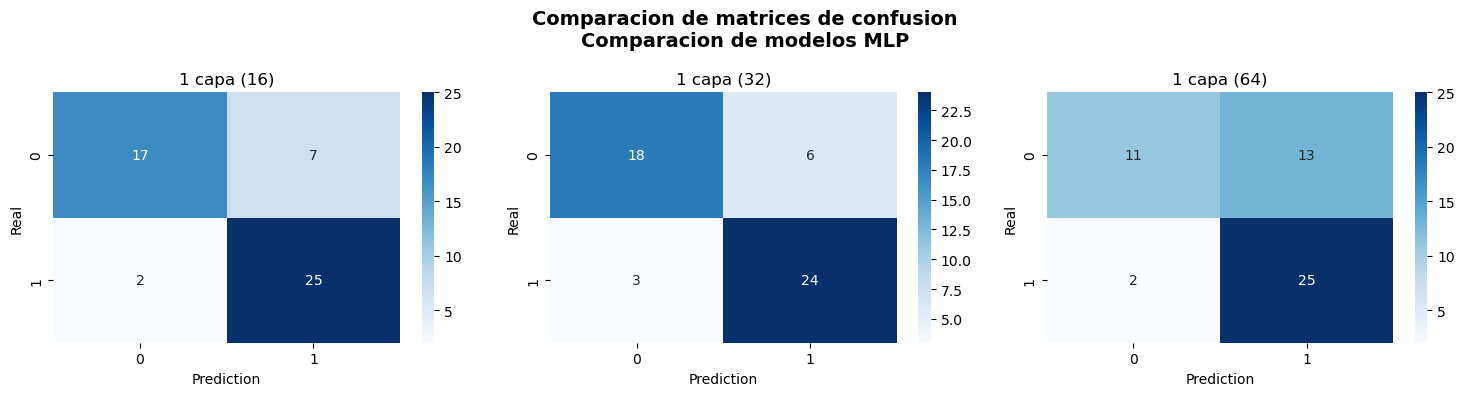

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


,Modelo,Accuracy,Precision,Recall,F1-Score
0,1 capa (16),0.823500,0.781200,0.925900,0.847500
1,1 capa (32),0.823500,0.800000,0.888900,0.842100
2,1 capa (64),0.705900,0.657900,0.925900,0.769200


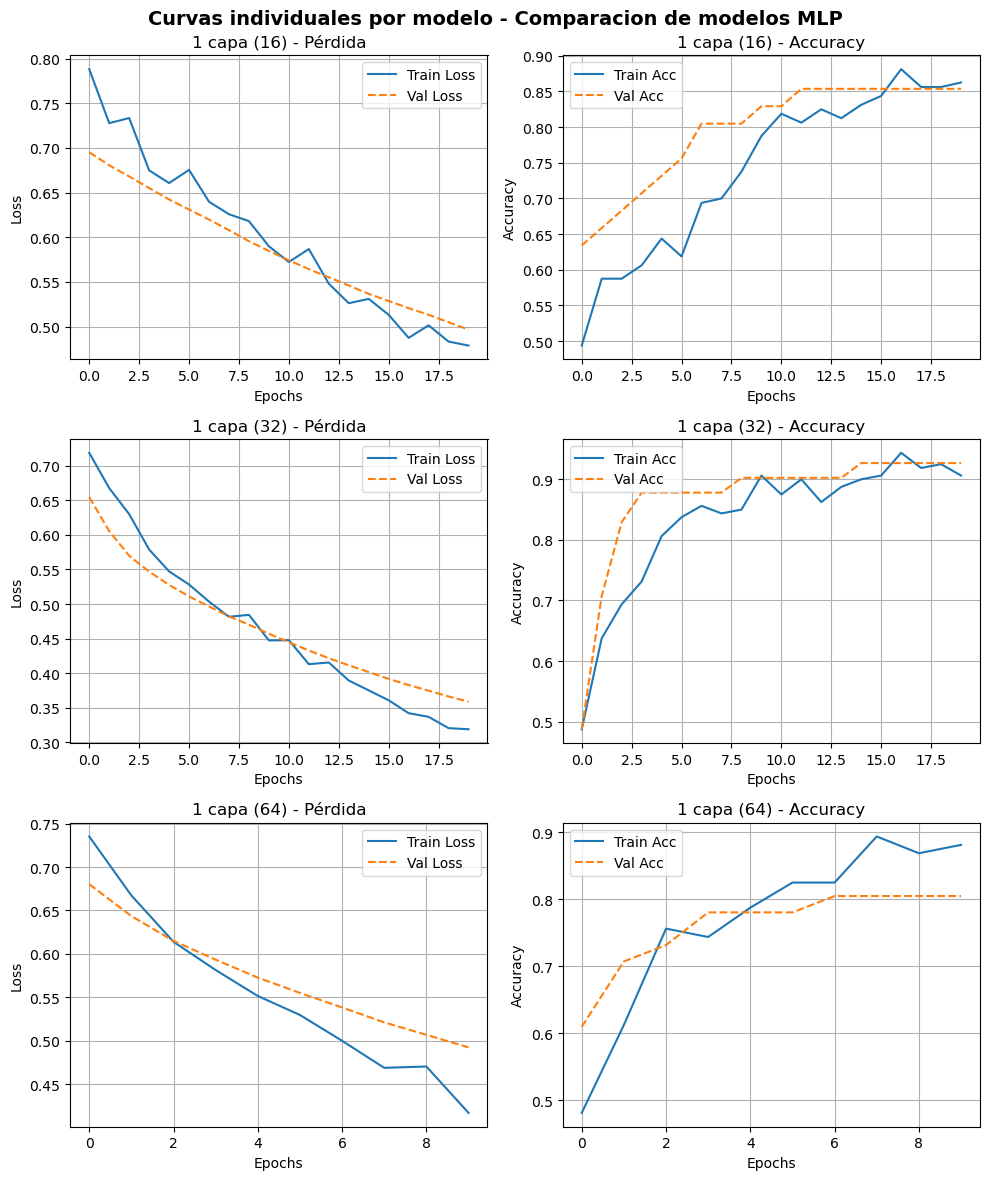

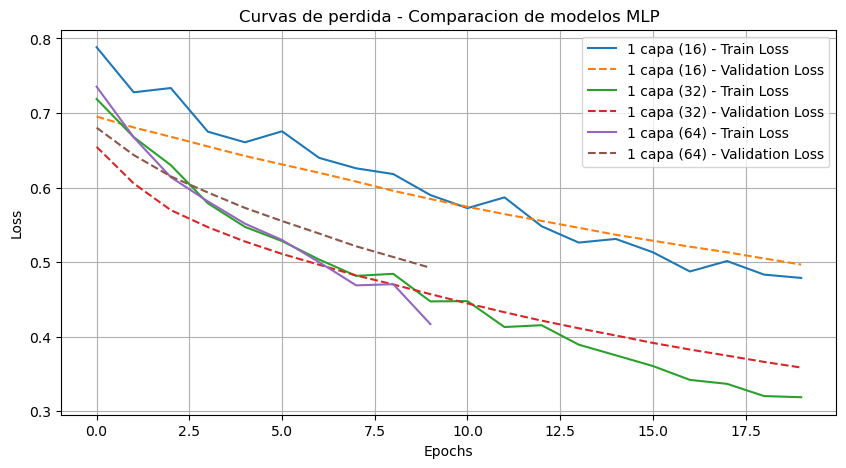

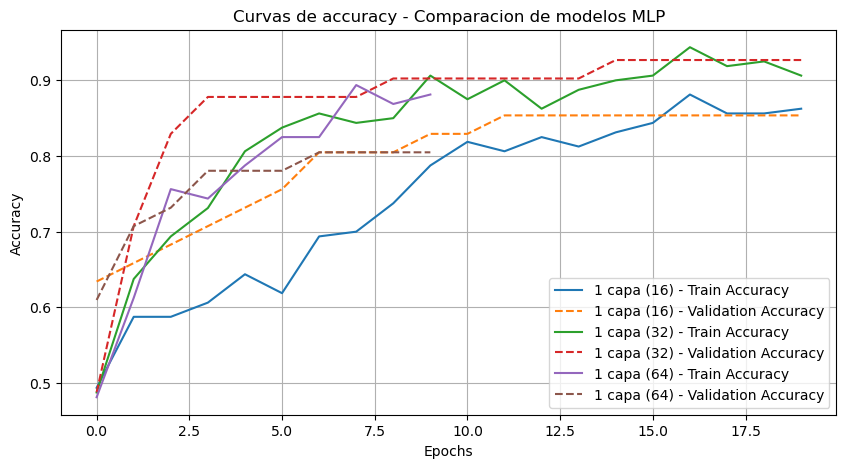


📘 Reporte detallado del modelo: 1 capa (16)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
              precision    recall  f1-score   support

         Bad       0.89      0.71      0.79        24
        Good       0.78      0.93      0.85        27

    accuracy                           0.82        51
   macro avg       0.84      0.82      0.82        51
weighted avg       0.83      0.82      0.82        51


📘 Reporte detallado del modelo: 1 capa (32)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
              precision    recall  f1-score   support

         Bad       0.86      0.75      0.80        24
        Good       0.80      0.89      0.84        27

    accuracy                           0.82        51
   macro avg       0.83      0.82      0.82        51
weighted avg       0.83      0.82      0.82        51


📘 Reporte detallado del modelo: 1 capa (64)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
              precision    recall  f1-score   support

         Bad       0.85      0.46      0.5

In [111]:
histories_1 = [
    history1_16,
    history1_32,
    history1_64
]

compare_models(models_1, histories_1, x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


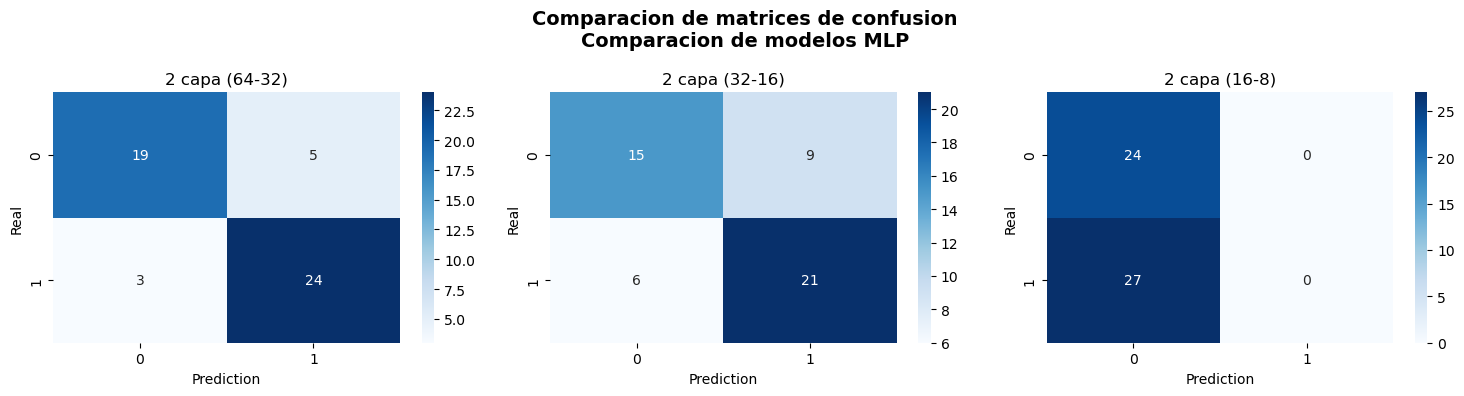

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


,Modelo,Accuracy,Precision,Recall,F1-Score
0,2 capa (64-32),0.843100,0.827600,0.888900,0.857100
1,2 capa (32-16),0.705900,0.700000,0.777800,0.736800
2,2 capa (16-8),0.470600,0.000000,0.000000,0.000000


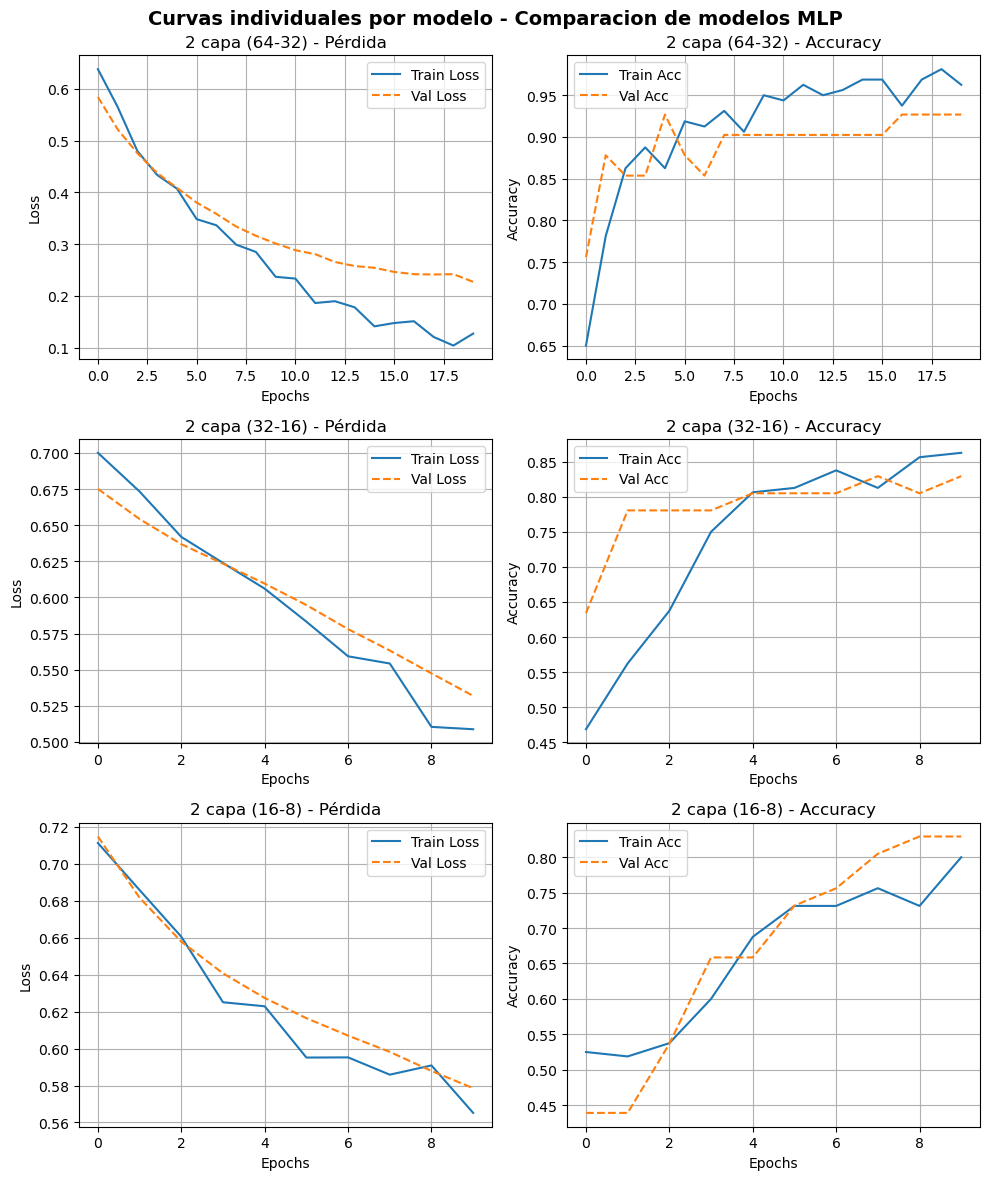

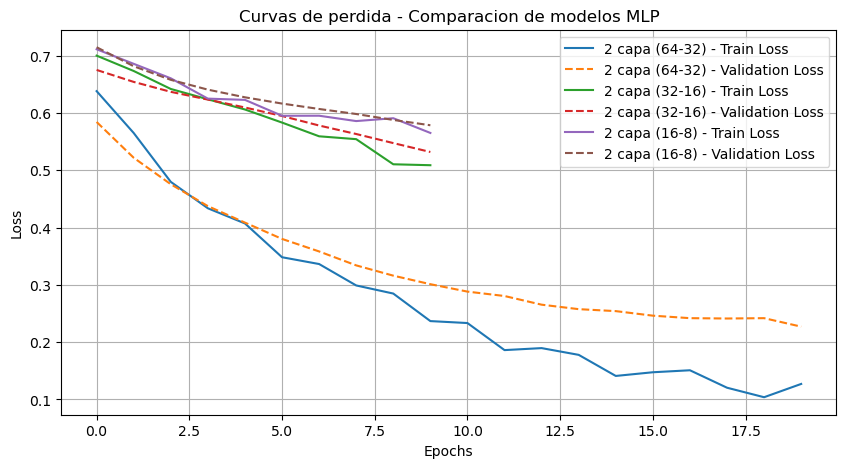

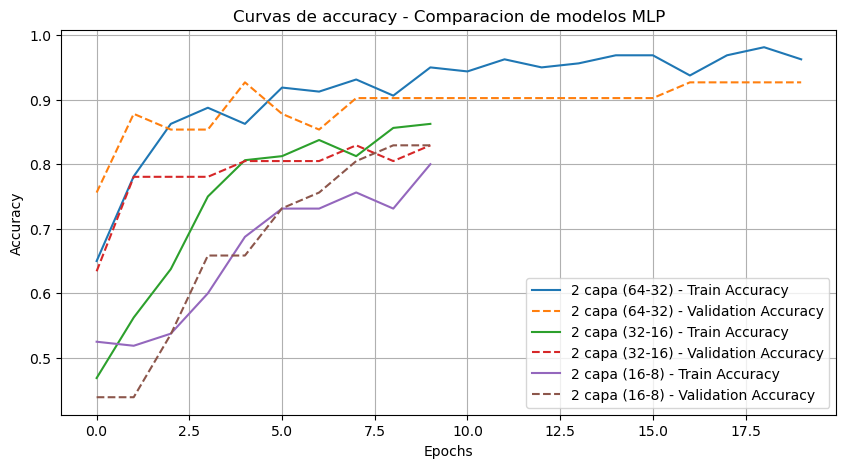


📘 Reporte detallado del modelo: 2 capa (64-32)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
              precision    recall  f1-score   support

         Bad       0.86      0.79      0.83        24
        Good       0.83      0.89      0.86        27

    accuracy                           0.84        51
   macro avg       0.85      0.84      0.84        51
weighted avg       0.84      0.84      0.84        51


📘 Reporte detallado del modelo: 2 capa (32-16)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
              precision    recall  f1-score   support

         Bad       0.71      0.62      0.67        24
        Good       0.70      0.78      0.74        27

    accuracy                           0.71        51
   macro avg       0.71      0.70      0.70        51
weighted avg       0.71      0.71      0.70        51


📘 Reporte detallado del modelo: 2 capa (16-8)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
              precision    recall  f1-score   support

         Bad       0.47      1.00 

In [112]:
histories_2 = [
    history2_64_32,
    history2_32_16,
    history2_16_8
]

compare_models(models_2, histories_2, x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


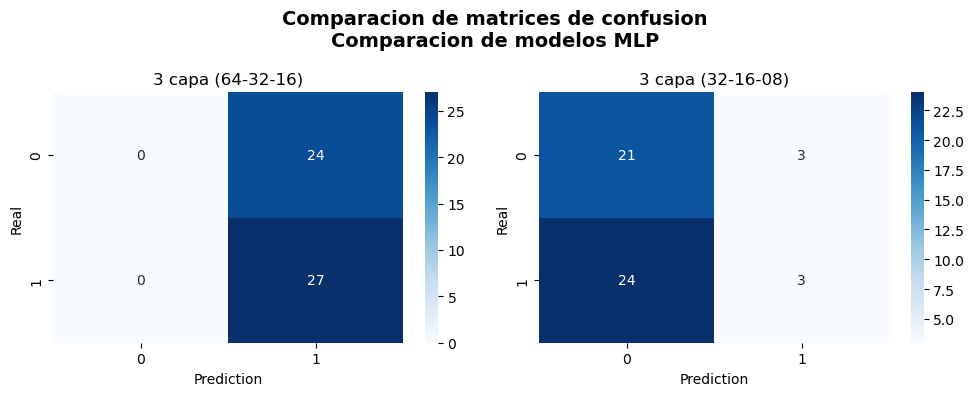

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


,Modelo,Accuracy,Precision,Recall,F1-Score
0,3 capa (64-32-16),0.529400,0.529400,1.000000,0.692300
1,3 capa (32-16-08),0.470600,0.500000,0.111100,0.181800


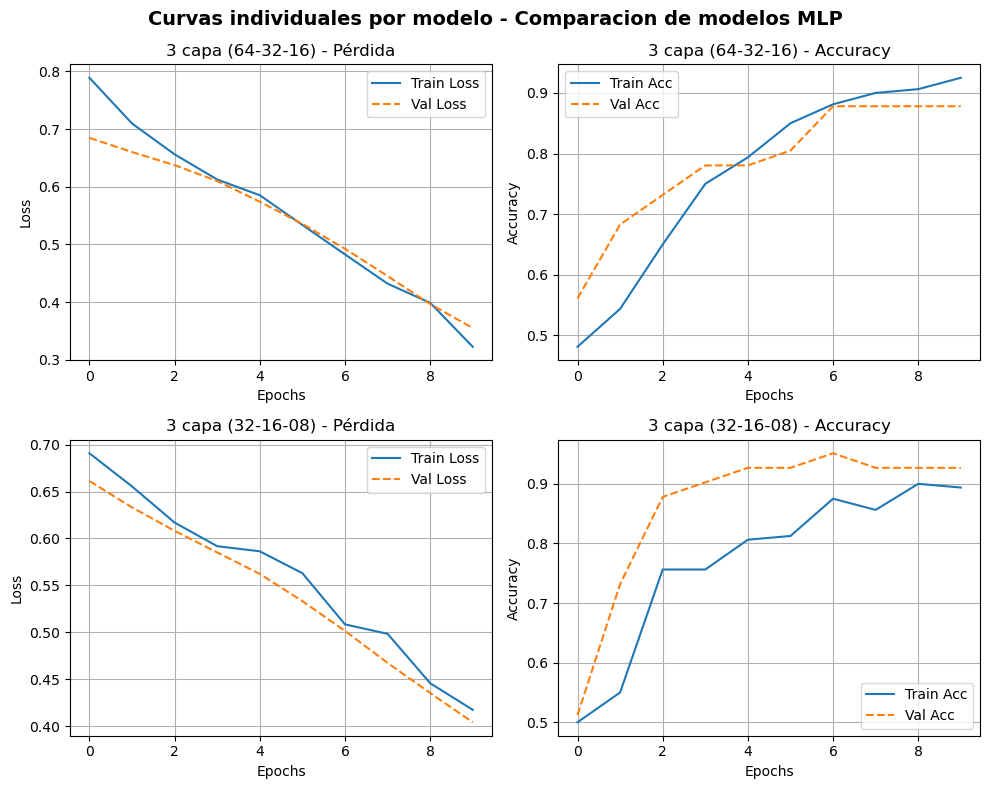

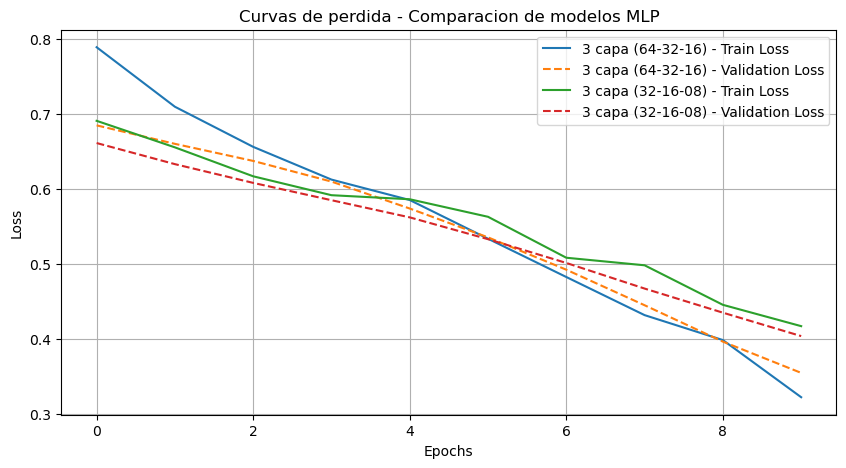

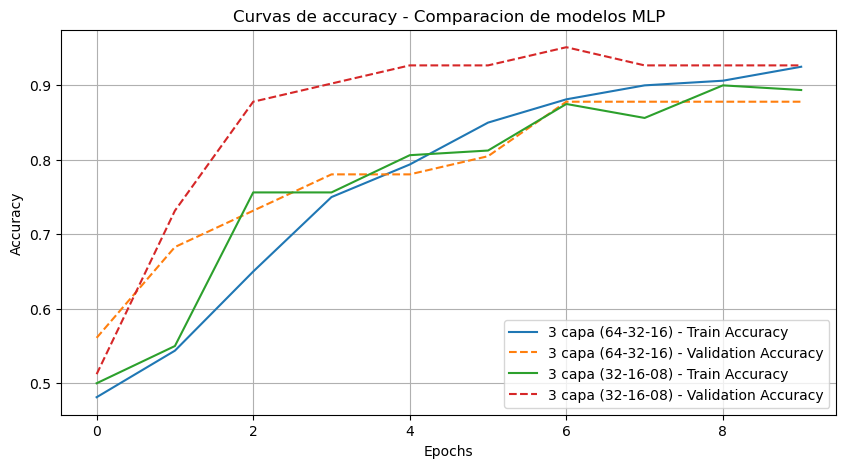


📘 Reporte detallado del modelo: 3 capa (64-32-16)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        24
        Good       0.53      1.00      0.69        27

    accuracy                           0.53        51
   macro avg       0.26      0.50      0.35        51
weighted avg       0.28      0.53      0.37        51


📘 Reporte detallado del modelo: 3 capa (32-16-08)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
              precision    recall  f1-score   support

         Bad       0.47      0.88      0.61        24
        Good       0.50      0.11      0.18        27

    accuracy                           0.47        51
   macro avg       0.48      0.49      0.40        51
weighted avg       0.48      0.47      0.38        51


 Mejor modelo segun F1-Socre: 3 capa (64-32-16) (F1 - 0.6923)


In [113]:
histories_3 = [
    history3_64_32_16,
    history3_32_16_8
]

compare_models(models_3, histories_3, x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


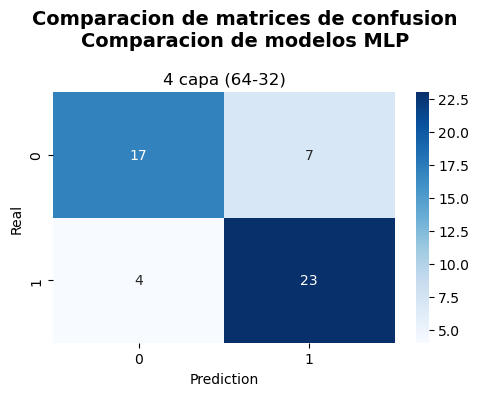

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


,Modelo,Accuracy,Precision,Recall,F1-Score
0,4 capa (64-32),0.784300,0.766700,0.851900,0.807000


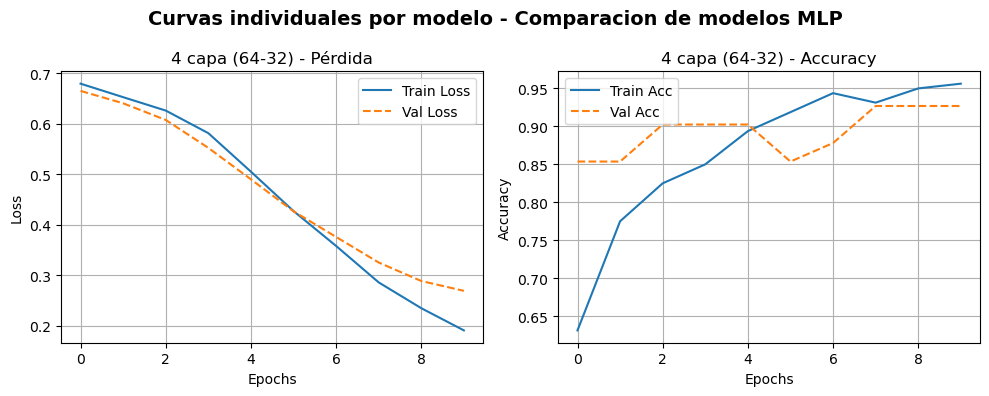


📘 Reporte detallado del modelo: 4 capa (64-32)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

         Bad       0.81      0.71      0.76        24
        Good       0.77      0.85      0.81        27

    accuracy                           0.78        51
   macro avg       0.79      0.78      0.78        51
weighted avg       0.79      0.78      0.78        51


 Mejor modelo segun F1-Socre: 4 capa (64-32) (F1 - 0.807)


In [114]:
histories_4 = [
    history4_64_32_16_8
]

compare_models(models_4, histories_4, x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


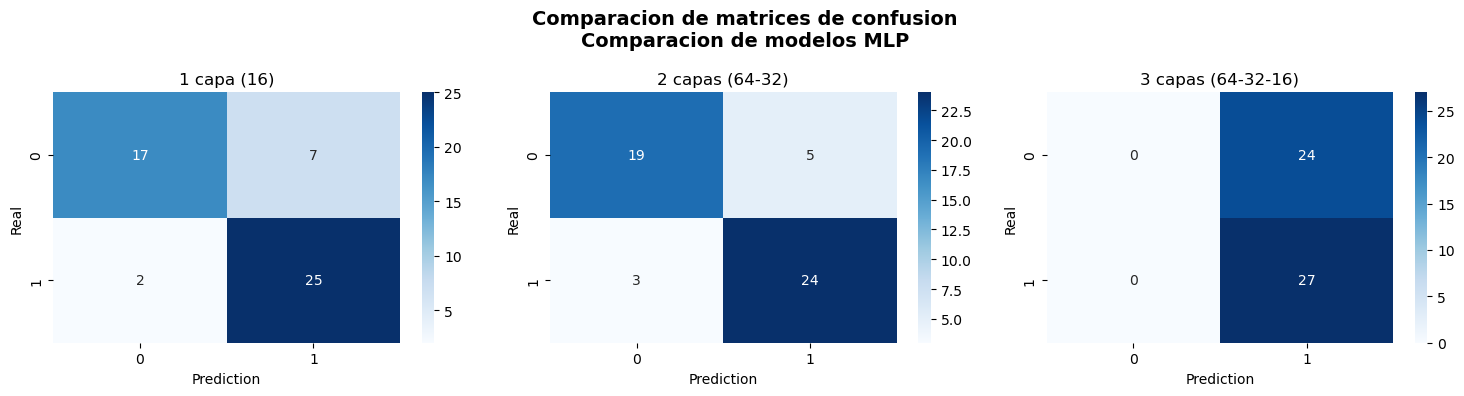

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


,Modelo,Accuracy,Precision,Recall,F1-Score
0,1 capa (16),0.823500,0.781200,0.925900,0.847500
1,2 capas (64-32),0.843100,0.827600,0.888900,0.857100
2,3 capas (64-32-16),0.529400,0.529400,1.000000,0.692300


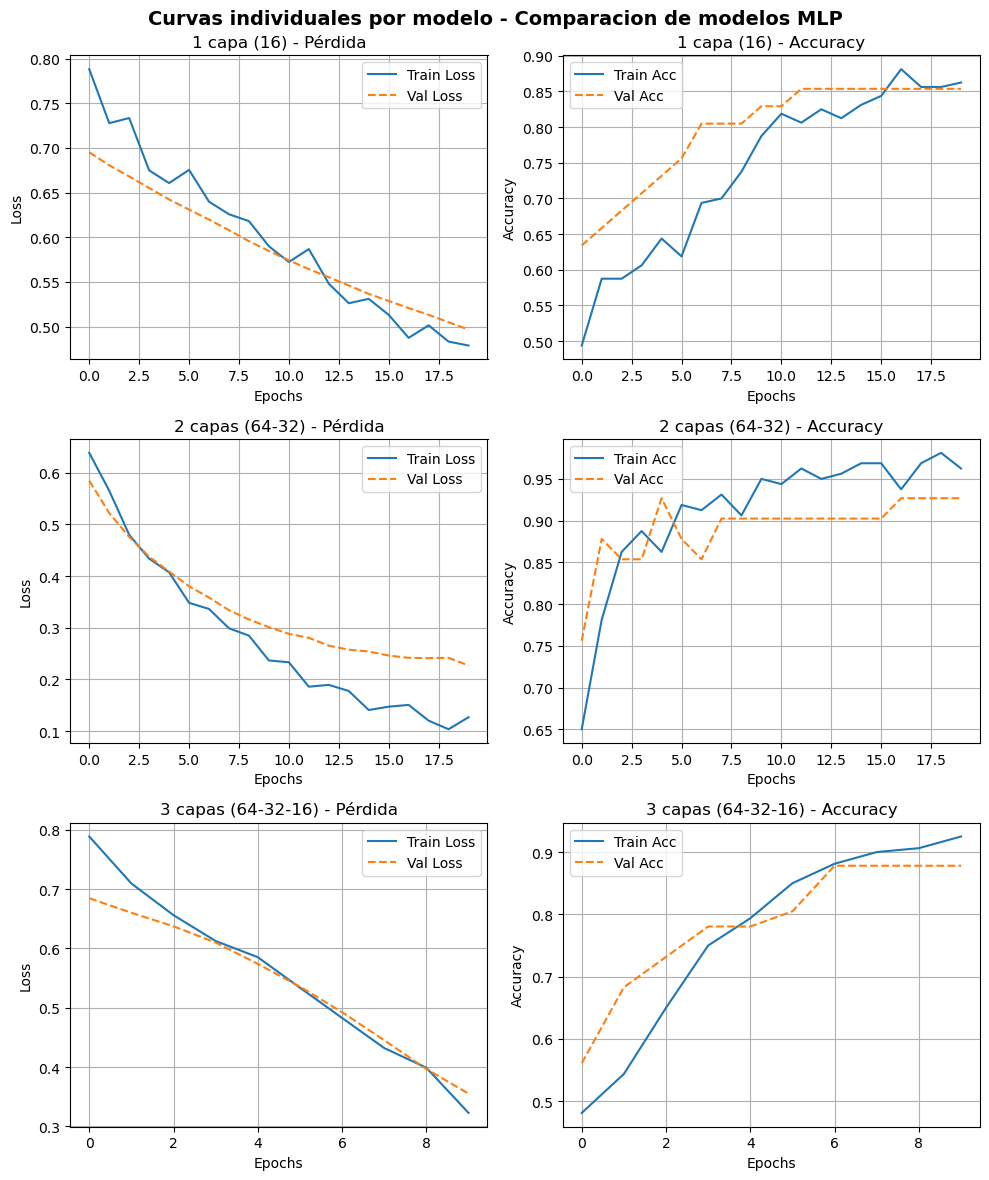

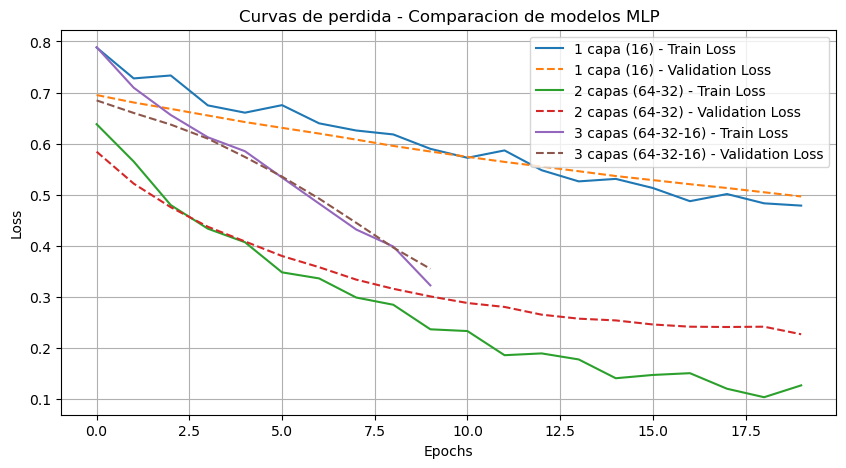

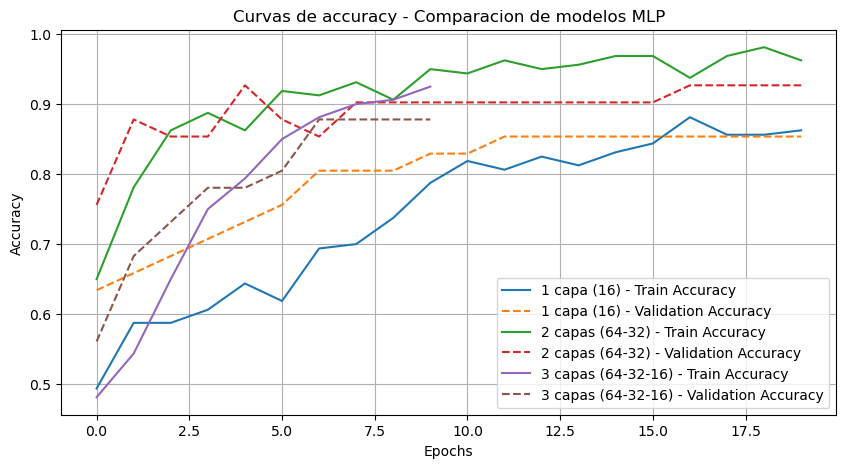


📘 Reporte detallado del modelo: 1 capa (16)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
              precision    recall  f1-score   support

         Bad       0.89      0.71      0.79        24
        Good       0.78      0.93      0.85        27

    accuracy                           0.82        51
   macro avg       0.84      0.82      0.82        51
weighted avg       0.83      0.82      0.82        51


📘 Reporte detallado del modelo: 2 capas (64-32)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
              precision    recall  f1-score   support

         Bad       0.86      0.79      0.83        24
        Good       0.83      0.89      0.86        27

    accuracy                           0.84        51
   macro avg       0.85      0.84      0.84        51
weighted avg       0.84      0.84      0.84        51


📘 Reporte detallado del modelo: 3 capas (64-32-16)
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
              precision    recall  f1-score   support

         Bad       0.00      0.

In [115]:
best_models = [
    ("1 capa (16)", model1_16),
    ("2 capas (64-32)", model2_64_32),
    ("3 capas (64-32-16)", model3_64_32_16)
]

best_histories = [
    history1_16,
    history2_64_32,
    history3_64_32_16
]

compare_models(best_models, best_histories, x_test, y_test)


### Conclusion
Se elige el **modelo 64–32** por mayor F1 y accuracy; las curvas muestran descenso de val_loss y estabilidad, early stopping evita sobreajuste; el **modelo 16** (1 capa) es la alternativa por simplicidad, pero queda levemente debajo en F1.